# Title : Heart Disease Prediction

`Author` : **Usman Majeed**\
`GitHub` : [GitHub](https://github.com/usman-bin-majeed/)\
`linked-In` : [linked-In](https://www.linkedin.com/in/usman-majeed-4265702ba/)\
`DataSet` : [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)
`Date` : 09th July, 2024\


## Meta-Data (ABout Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
- `id` (Unique id for each patient)
- `age` (Age of the patient in years)
- `origin` (place of study)
- `sex` (Male/Female)
- `cp` chest pain type 
  1. Typical angina
  2. Atypical angina
  3. Non-anginal
  4. Asymptomatic
- `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- `chol` (serum cholesterol in mg/dl)
- `fbs` (if fasting blood sugar > 120 mg/dl)
- `restecg` (resting electrocardiographic results)
- `-- Values`: [normal, stt abnormality, lv hypertrophy]
- `thalach`: maximum heart rate achieved
- `exang`: exercise-induced angina (True/ False)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment
- `ca`: number of major vessels (0-3) colored by fluoroscopy
- `thal`: [normal; fixed defect; reversible defect]
- `num`: the predicted attribute
### Acknowledgements
#### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
- Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
`Citation Request`:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objectives

we will fill after doing some Exploratory Data Analysis

---
### Import Libraries

- Let's start the project by importing all the libraries we will be uusing in ths project.

In [349]:
# Import libraries


# To HANDLE THE DATA
import pandas as pd
import numpy as np

# To VISUALIZE THE DATA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

# TO PRE PROCESS THE DATA
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , StandardScaler
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MACHINE LEARNING TASKS
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification taks

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Metrics

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , mean_squared_error , r2_score , mean_absolute_error


In [350]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [351]:
df = pd.read_csv("heart_disease_uci.csv")

# Print 5 rows of the data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis (EDA)
### Explore each column

In [352]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


- Shape of data

In [353]:
df.shape

(920, 16)

- Range of id

In [354]:
df['id'].min() , df['id'].max()

(1, 920)

- Age Column

In [355]:
df['age'].min() , df['age'].max()

(28, 77)

- Drae a histogram to see the distribution of data

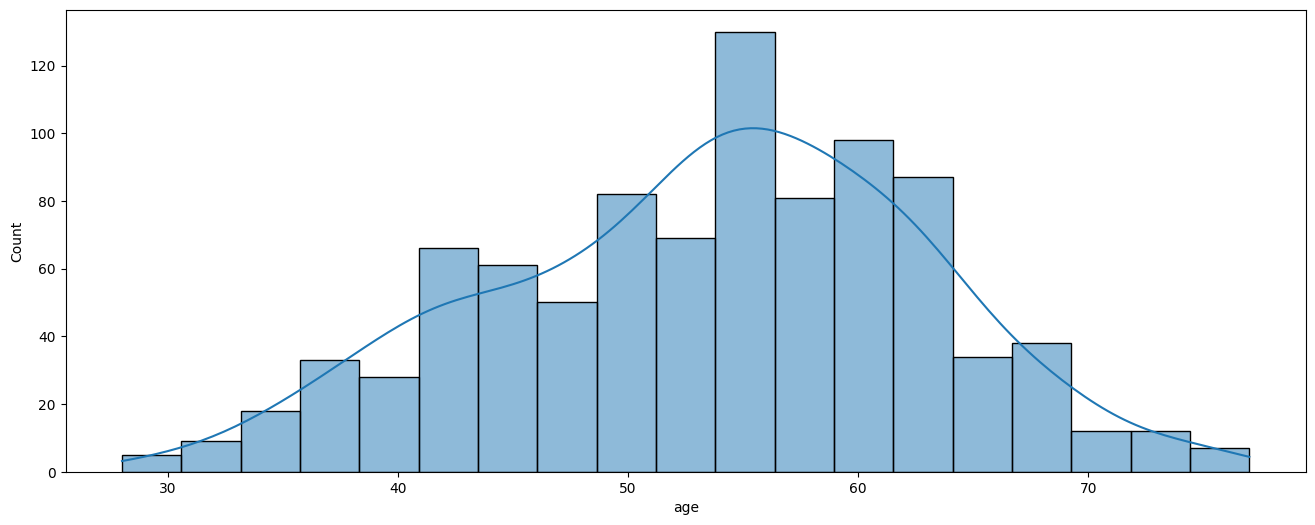

In [356]:
plt.figure(figsize=(16 , 6))
sns.histplot(df['age'] , kde= True)
plt.show()

- Plot the mean, median , mode of age column

Mean :  53.51086956521739
Median :  54.0
Mode : 0    54
Name: age, dtype: int64 


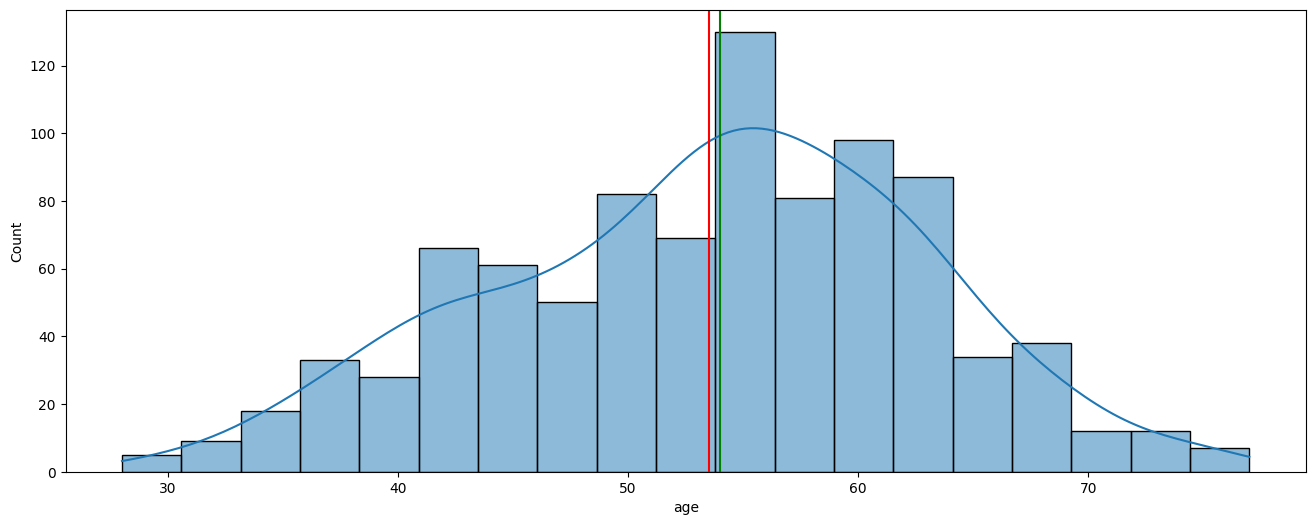

In [357]:
plt.figure(figsize=(16 , 6))
sns.histplot(df['age'] , kde= True)
plt.axvline(df['age'].mean() , color= 'red')
plt.axvline(df['age'].median() , color = 'green')
# plt.axvline(df['age'].mode[0] , color = 'blue' )

print("Mean : " , df['age'].mean())
print("Median : " , df['age'].median())
print(f"Mode : {df['age'].mode()} ")



- Plot the histogram of age column using plotly and coloring it by sex 

In [358]:
fig  = px.histogram(data_frame= df , x='age' , color= 'sex' )
fig.show()

- Find teh values of sex column.

In [359]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

- Calculating the percentages sex wise.

In [360]:
male_count = 726
female_count = 194

total = male_count + female_count

male_perc = (male_count / total) * 100

female_perc = (female_count / total) * 100

# Display the results

print(f"Male percentage in the data : {male_perc}")

print(f"Female percentage in the data : {female_perc}")

# Difference 

differ_per  = ((male_count-  female_count) / female_count) * 100

print(f"Males are {differ_per:.2f}% more than females in the data")

Male percentage in the data : 78.91304347826087
Female percentage in the data : 21.086956521739133
Males are 274.23% more than females in the data


- FInd the value count of the age column grouped with sex column.

In [361]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

---
Let's deal with dataSet column


In [362]:
# Find unique values in the dataset.

df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

- What is the value count of unique values ?
  

In [363]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

- Plot the count plot of the dataset column

In [364]:
# plt.figure(figsize=(16 , 6))
# sns.countplot(data= df , x = 'dataset' , hue = 'sex')
# plt.show()

fig = px.bar(df , x = 'dataset' , color= 'sex')
fig.show()

- Let's check the value count of sex with respect to the dataset column.

In [365]:
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

- Plot of age column using plotly and coloring it with dataset column.

In [366]:
fig = px.histogram(data_frame= df , x = 'age' , color= 'dataset')
fig.show()

# Print the mean , media , mode of the age column grouped by dataset column
print( "Mean of the dataset :  ", df.groupby('dataset')['age'].mean())
print("===================================================")
print( "Median of the dataset : ", df.groupby('dataset')['age'].median())
print("===================================================")
print( "Mode of the dataset : ", df.groupby('dataset')['age'].agg(pd.Series.mode)) 

Mean of the dataset :   dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median of the dataset :  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode of the dataset :  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


  ### Let's explore the `cp` column.

- Value count of the colunmn.

In [367]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

- Draw the plot of age grouped by cp column using plotly

In [368]:
fig = px.histogram(data_frame= df , x = 'age' , color='cp')
fig.show()

- Count plot of cp column by sex column


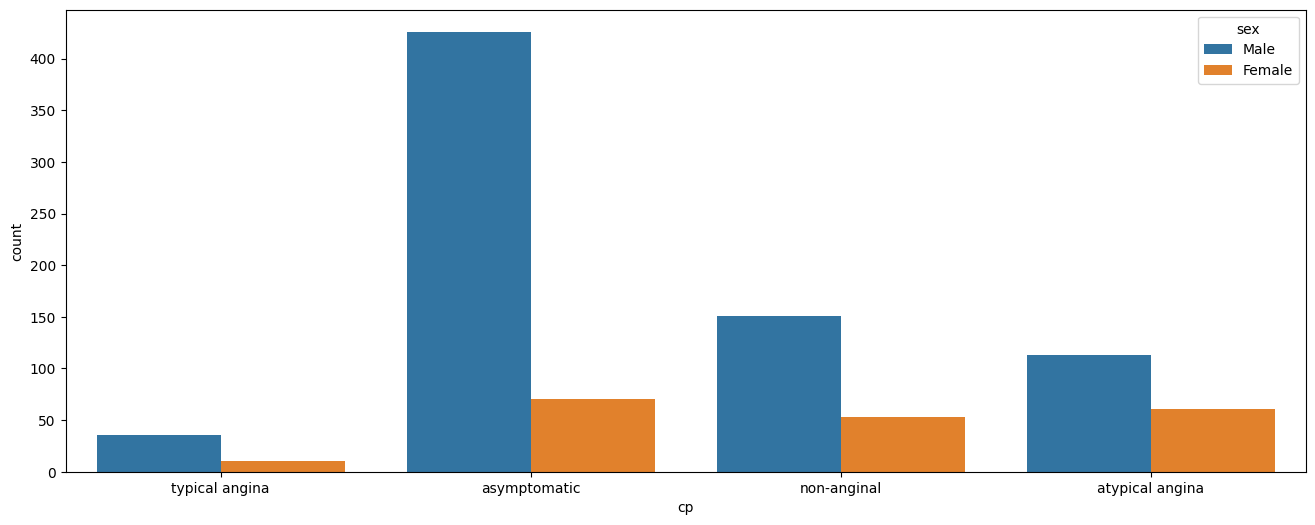

In [369]:
plt.figure(figsize=(16 , 6))
sns.countplot(df , x = 'cp' , hue='sex')
plt.show()

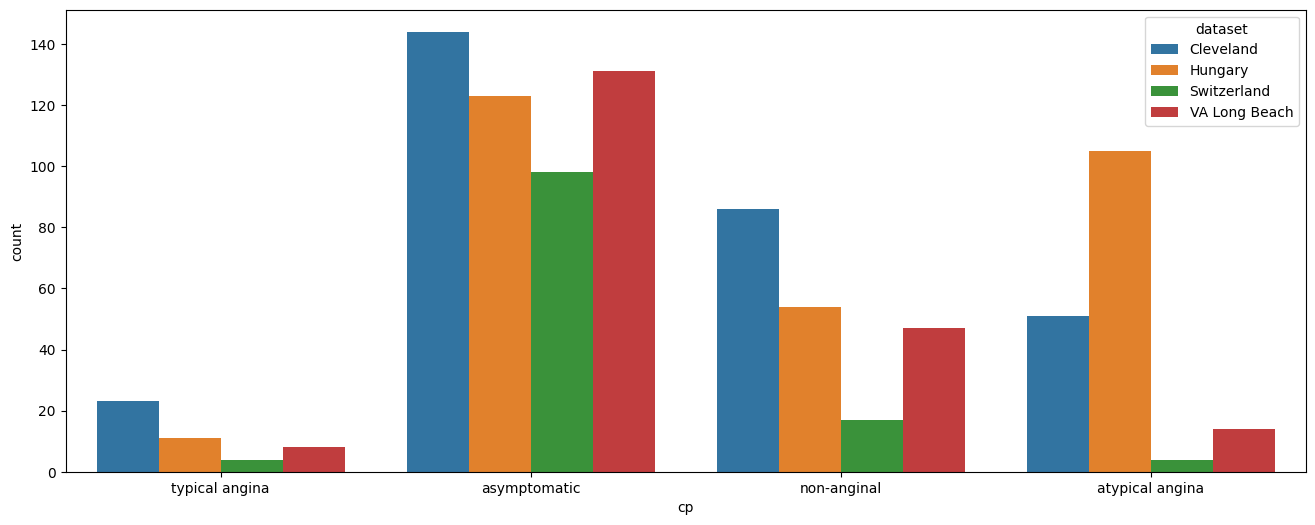

In [370]:
plt.figure(figsize=(16 , 6))
sns.countplot(df , x = 'cp' , hue='dataset')
plt.show()

## Let's explore the `trestbps` (resting blood pressure) column:

- The normal blood pressure level of a person is $ 120 / 80 $ mm HG

- Value counts of the trestbps column.

In [371]:
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

In [372]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

- Create a histplot of `trestbps` column.

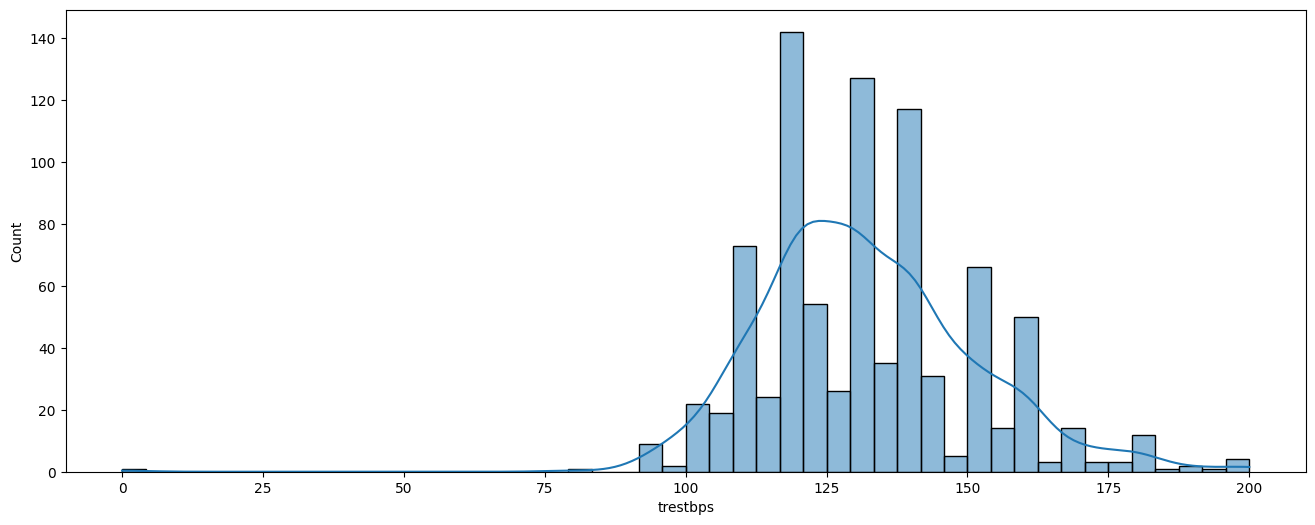

In [373]:
plt.figure(figsize=(16 , 6))
sns.histplot(df['trestbps'] , kde= True)
plt.show()

---


<span style = "color : yellow; font-size : 250%; font-weight: bold;"> Dealing with Missing Values</span>

- First, we will identify the columns having any missing values in them.

In [374]:
df.isnull().sum()[df.isnull().sum() > 0 ].sort_values(ascending= False)
missing_data_columns = df.isnull().sum()[df.isnull().sum()>0].index.tolist()
missing_data_columns

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

- We will separate the columns with respect to their datatype and pass it inot the list.

In [375]:
categorical_cols = ['thal' , 'ca' ,'slope' , 'exang' , 'restecg', 'fbs' , 'cp' , 'sex' , 'num']
bool_columns =  [ 'fbs' , 'exang' ]
numeric_cols = ['oldpeak' , 'thalch' , 'chol' , 'trestbps' , 'age']

- ## define the function to impute the missing values in all categorical and regression column.


In [376]:

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_columns if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_columns:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_columns:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_columns if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

- Here we will check tje missing values before passing the data to the function.

In [377]:
df.isnull().sum().sort_values(ascending= False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

- ### Impute missing values using our above defined functions.


In [378]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

for col in missing_data_columns:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.30965317919075 

RMSE = 17.29596977680729 

R2 = 0.06595535992310042 

Missing Values chol : 3.26%
MAE = 45.05230337078652 

RMSE = 64.42647975654285 

R2 = 0.6711881580031543 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Missing Values thalch : 5.98%
MAE = 16.73849710982659 

RMSE = 21.81433863178521 

R2 = 0.3080520696335364 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5768895348837209 

RMSE = 0.8048188406586104 

R2 = 0.38290189191460844 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.92 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



- We will check if their are any null values left in the data

In [379]:
df.isnull().sum().sort_values(ascending= False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- ### Great , we have succcessfully imputed all the missing values from the data.

---
<span style = "color : yellow; font-size : 250%; font-weight: bold;"> Dealing with Outliers</span>

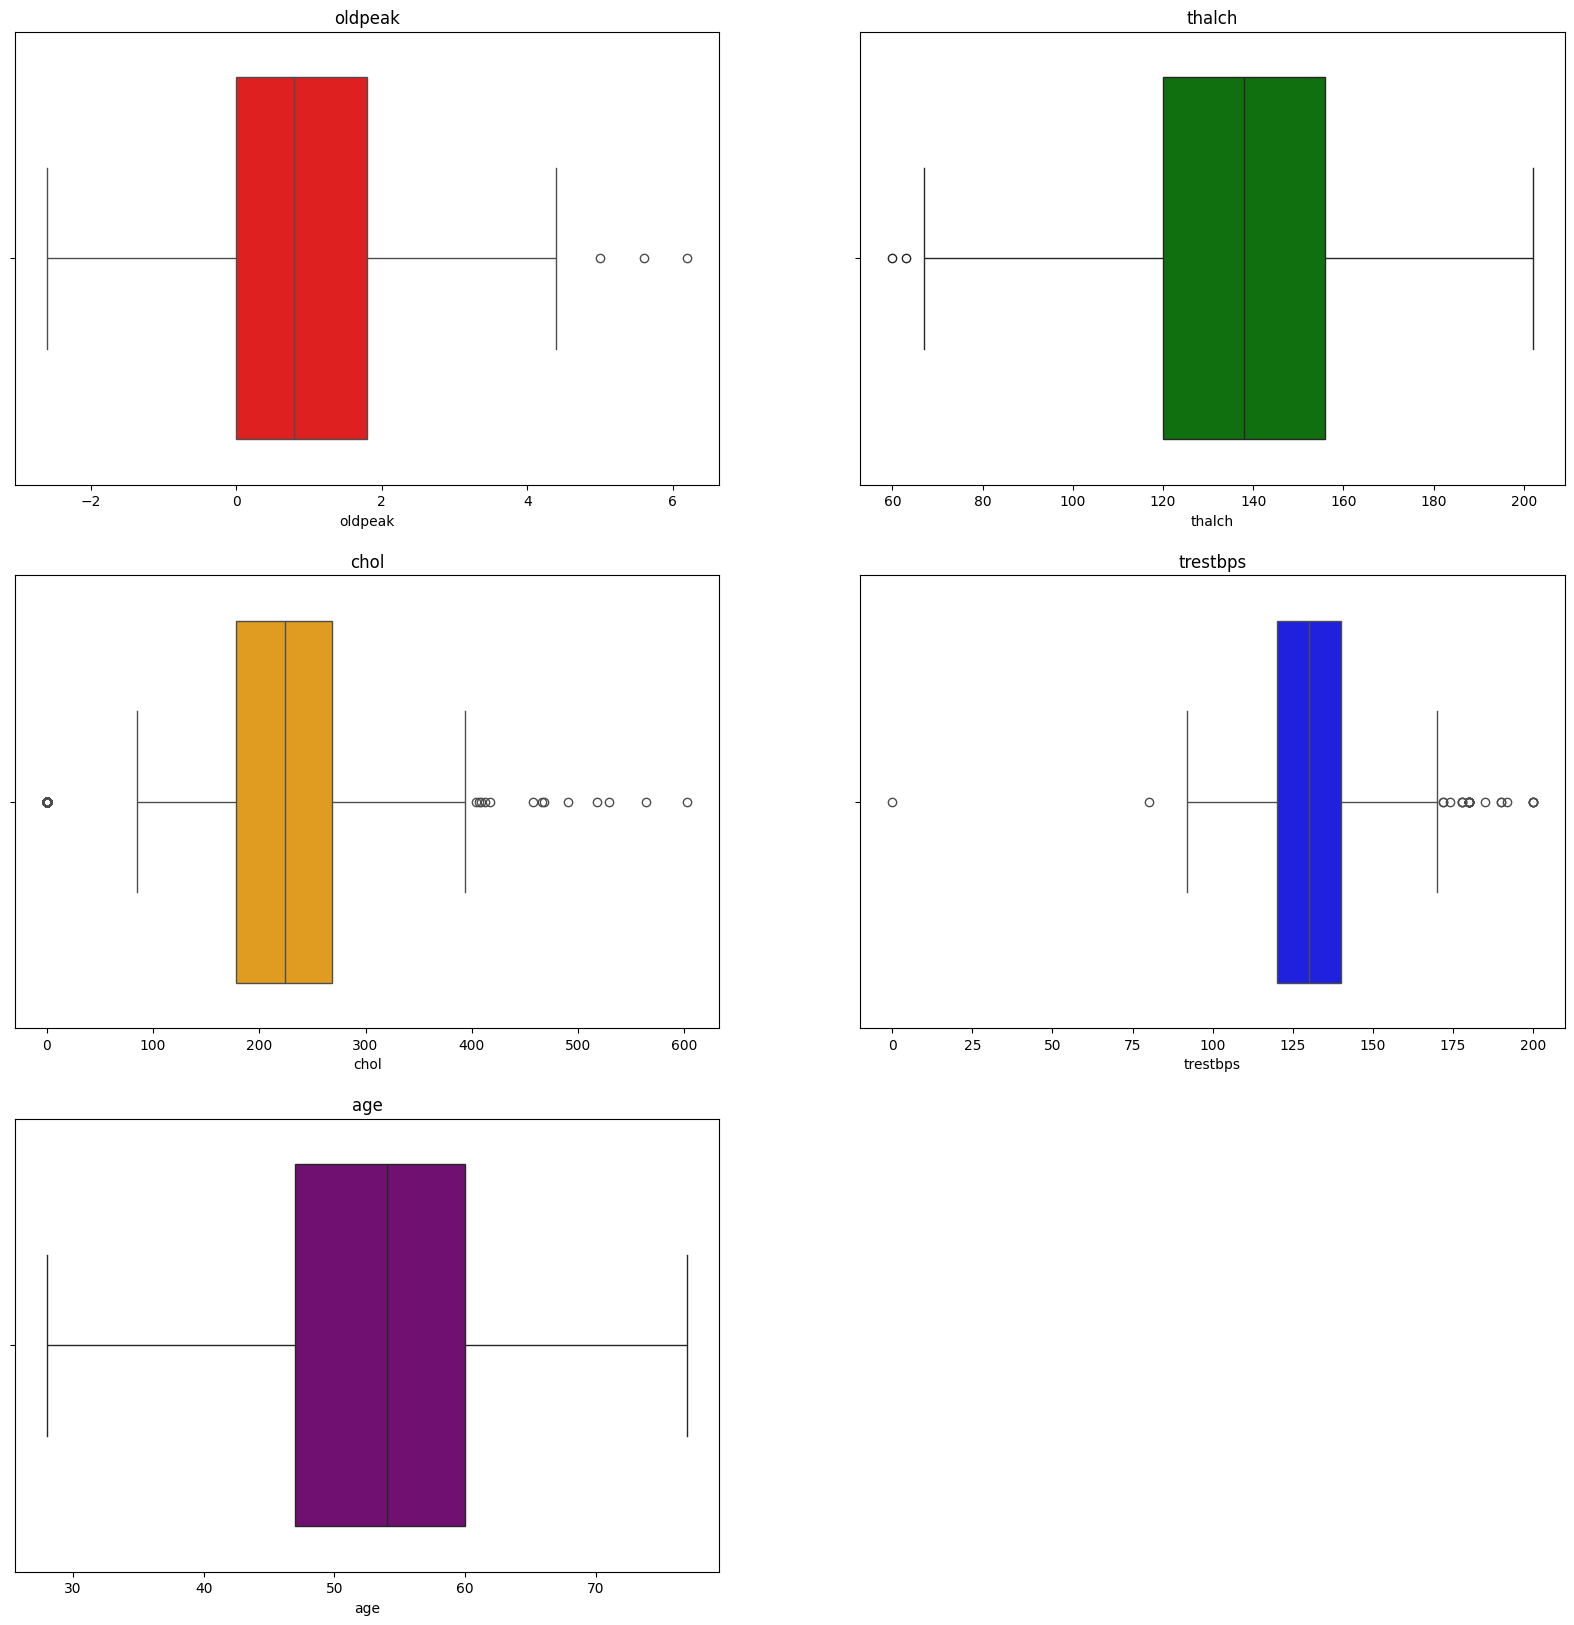

In [380]:
plt.figure(figsize = (20 , 20))

colors = ['red' , 'green' , 'orange' , 'blue' , 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3 , 2 , i+1)
    sns.boxplot(x = df[col] , color= colors[i])
    plt.title(col)

plt.show()

In [381]:
fig = px.box(df ,  y = numeric_cols , color_discrete_sequence= colors) 
fig.update_layout(title = "Box plot for numeric columns" , height = 800 , width = 1000) 
fig.show()

- Print the row where the value of trestbps is zero.


In [382]:
df[df['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.0,reversable defect,3


- Remove this row from the data , because that is a potential outlier

In [383]:
df = df[df['trestbps'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [384]:
fig = px.box(df ,  y = numeric_cols , color_discrete_sequence= colors) 
fig.update_layout(title = "Box plot for numeric columns" , height = 800 , width = 1000) 
fig.show()

---
<span style = "color : yellow; font-size : 250%; font-weight: bold;"> Machine Learning</span>

In [385]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [386]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The target column is `num` which is predicted attribute. We will use this column to predict the heart disease.
THe unique values in this columns are [0 , 1 , 2 , 3 , 4] , which states that these are 5 stages or types of heart disease.

- `0 = No heart disease`
- `1 = Mild heart disease` 
- `2 = Moderate heart disease` 
- `3 = Severe heart disease` 
- `4 = Critical heart disease `


### Let's split the data into X and y 

In [387]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [388]:
# ENCODING

le_age = LabelEncoder()
le_sex = LabelEncoder()
le_dataset = LabelEncoder()
le_cp = LabelEncoder()
le_trestbps = LabelEncoder()
le_chol = LabelEncoder()
le_fbs  = LabelEncoder()
le_restecg  = LabelEncoder()
le_thalch  = LabelEncoder()
le_exang  = LabelEncoder()
le_oldpeak  = LabelEncoder()
le_slope  = LabelEncoder()
le_ca  = LabelEncoder()
le_thal  = LabelEncoder()


df['sex'] = le_sex.fit_transform(df['sex'])
df['age'] = le_age.fit_transform(df['age'])
df['dataset'] = le_dataset.fit_transform(df['dataset'])
df['cp'] = le_cp.fit_transform(df['cp'])
df['trestbps'] = le_trestbps.fit_transform(df['trestbps'])
df['chol'] = le_chol.fit_transform(df['chol'])
df['fbs'] = le_fbs.fit_transform(df['fbs'])
df['restecg'] = le_restecg.fit_transform(df['restecg'])

df['thalch'] = le_thalch.fit_transform(df['thalch'])

df['exang'] = le_exang.fit_transform(df['exang'])
df['oldpeak'] = le_oldpeak.fit_transform(df['oldpeak'])
df['slope'] = le_slope.fit_transform(df['slope'])
df['ca'] = le_ca.fit_transform(df['ca'])
df['thal'] = le_thal.fit_transform(df['thal'])

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,35,1,0,3,91,102,1,0,131,0,67,0,0,0,0
1,2,39,1,0,0,104,167,0,0,34,1,28,1,3,1,2
2,3,39,1,0,0,21,93,0,0,99,1,82,1,2,2,1
3,4,9,1,0,2,35,123,0,1,167,0,101,0,0,1,0
4,5,13,0,0,1,35,57,0,0,153,0,25,2,0,1,0


In [389]:
X = df.drop('num' , axis= 1)
y = df['num']



In [390]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42)




- Enlist all the models of classificaition or multi class classification

1. Logistic Regression
2. KNN
3. Decision Tree
4. Random Forest
5. Support Vector Machines
6. Naive Bayes
7. XGBoost
8. AdaBoost
9. Gradient Boost
10. light GBM

- Importing all models

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier ,  AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
# from lightGBM import LGBMClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 


In [392]:
df.dtypes

id          int64
age         int64
sex         int32
dataset     int32
cp          int32
trestbps    int64
chol        int64
fbs         int32
restecg     int32
thalch      int64
exang       int32
oldpeak     int64
slope       int32
ca          int64
thal        int32
num         int64
dtype: object

- Create a function to train and evaluate all the models and seleect the best ones with tuned parameters

In [393]:
models = [
    ('Random Forest' , RandomForestClassifier(random_state= 42)),
    ('Gradient Boosting Classifier' , GradientBoostingClassifier(random_state= 42)),
    ('Support Vector Machines' , SVC(random_state= 42)),
    ('Logistic Regression' , LogisticRegression(random_state= 42)),
    ('K Nearest Neighbors ' , KNeighborsClassifier()),
    ('Decision Tree Classifier' , DecisionTreeClassifier(random_state= 42)),
    ('Ada Boost Classifier' , AdaBoostClassifier(random_state= 42)),
    ('XG Boost' , XGBClassifier(random_state= 42)),
    ('Guassian Naive Bayes' , GaussianNB())
    
]

best_model = None
best_accuracy = 0.0

for name , model in models:
    pipeline = Pipeline([
        ('model' , model)
    ])
    
    # Perform the cross validation
    scores = cross_val_score(pipeline , X_train , y_train , cv = 5)

    # Calculate the mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipelilne on the training data
    pipeline.fit(X_train , y_train)

    # Make presictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculating the accuracy Scores
    accuracy = accuracy_score(y_test , y_pred)

    # Displaying the performance Metrics

    print("Model : " , name)
    print("Cross Validation Score : " , mean_accuracy)
    print("Test Accuracy : " , accuracy)
    print()

    # Checking if the current model had the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model

print("Best Model : ", best_model)





Model :  Random Forest
Cross Validation Score :  0.6462585034013606
Test Accuracy :  0.6739130434782609

Model :  Gradient Boosting Classifier
Cross Validation Score :  0.6421768707482993
Test Accuracy :  0.6630434782608695

Model :  Support Vector Machines
Cross Validation Score :  0.5877551020408163
Test Accuracy :  0.5706521739130435

Model :  Logistic Regression
Cross Validation Score :  0.5238095238095238
Test Accuracy :  0.5217391304347826

Model :  K Nearest Neighbors 
Cross Validation Score :  0.5863945578231292
Test Accuracy :  0.6032608695652174

Model :  Decision Tree Classifier
Cross Validation Score :  0.5986394557823129
Test Accuracy :  0.6358695652173914

Model :  Ada Boost Classifier
Cross Validation Score :  0.5972789115646259
Test Accuracy :  0.5978260869565217

Model :  XG Boost
Cross Validation Score :  0.6408163265306122
Test Accuracy :  0.6521739130434783

Model :  Guassian Naive Bayes
Cross Validation Score :  0.5714285714285715
Test Accuracy :  0.538043478260869

# SAve the best model

In [394]:
import pickle

pickle.dump(best_model , open("heart_disease_prediction.pkl" , 'wb'))

### **Outputs**
1. The minimum age to have heart disease starts from 28 years old.
2. Most of the heart disease patients are aged between 53-54 years.
3. MOst of the males and females that get heart diseases are betweem the age of 54-55 years.
4. Male percentage in the data : 78.91
5. Female percentage in the data : 21.08
6. Males are 274.23% more than females in the data.
7. We have highest number of people from the cleveLand (304) and the lowest from SwitzerLand (123).
    1. The highest number of females in the datset are from cleveland and loweest from VA long beach.
    2.  The highest number of males in the datset are from Hungary and loweest from Switzerland.
8. Observations from the cp column are : 
    1. asymptomatic       (496)
    2. non-anginal        (204)
    3. atypical angina    (174)
	4. typical angina      (46)
9. We dealt with the missing values in the dataset.
   1.  First, we have separated the columns having null values based on their datatypes.
   2.  Secondly, we defined a function to impute the missing values.
        -  Function is defined in such a way that :
           - Regression models like `Random Forest Regressor` is used to deal with the numeric columns.
           - Similarly, Classification model like `Random Forest Classifier` is used to impute the missing values in the categorical columns. 
           - Then , we used for loops to apply this function on the data.
           - Lastly , we double checked that if there are any null values left in the dataset.
           - Yes , There were None.
10. Next , we dealt with the outliers.
    - We plotted the box plot to check for any outliers.
    - Then we removed any potential outliers based on our domain knowledge.
11. We created a pipeline for finding the best model for our classification problem, 
    1.  For that we created a pipeline to find the best model.
12. The best model we found is **RandomForestClassifier**.
13. 



---

## **Hints and tips in order to increase the accuracy of the model.**
1. Feature Engineering
2. Better Feature Selection
3. Data Pre-Processing ( Scaling and normalization )
4. HyperParameter Tuning
   1. Ensemble Learning ( Stacking , Bagging , Boosting )
5. Use a different model. 

---